In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Date native avec python

Tout d'abord on peut manipuler des dates en Python de manière native (sans avoir à installer d'autre librairies)  
Les dates sont des objects un peu différent par rapport aux autres grandeurs que nous pourrions manipuler, elles peuvent être des chaînede caractères, on peut ajouter ou soustraire une durée, ainsi, elles sont connues pour tout un tas de possibilités.

In [2]:
from datetime import datetime, timedelta, time, date
from dateutil import parser

In [3]:
# Avoir la date d'aujourd'hui

date.today()

datetime.date(2025, 11, 4)

In [4]:
# ici, la date correspondant au 4 janvier 2022 à 13h23

d1 = datetime(2022, 1, 4, 13, 23)
d1

datetime.datetime(2022, 1, 4, 13, 23)

In [5]:
d1.year, d1.month, d1.day, d1.hour, d1.minute

(2022, 1, 4, 13, 23)

In [6]:
#On peut créer une date à partir d'un string

d2 = datetime.strptime('2022-01-01', '%Y-%M-%d')
d2

datetime.datetime(2022, 1, 1, 0, 1)

In [7]:
# Ou récupérer une string depuis une date

date_string = datetime.strftime(d2, '%Y-%M-%d')
date_string

'2022-01-01'

In [8]:
# On peut récupérer une string depuis une date sans avoir à spécifier le format, on a ainsi le format conventionnel

date.isoformat(d1)

'2022-01-04'

In [9]:
# Et la fonction inverse existe aussi

date.fromisoformat('2022-01-04')

datetime.date(2022, 1, 4)

In [9]:
# Le parser de dateutil est plus puissant car il détecte automatiquement les mois et les jours mais il faut faire attention au format, je recommande plutôt d'utiliser les fonctions précédemment citées

parser.parse('05/01/2023')

datetime.datetime(2023, 5, 1, 0, 0)

In [10]:
# Timedelta permet de rajouter ou d'enlever du temps à une date, en respectant tout les principes d'une mesure temporelle (un jour fait 24 heures, une heure fait 60 minutes etc...)
# Ici, on rajoute 5 jours à notre première date d1

d1 + timedelta(days=5)

datetime.datetime(2022, 1, 9, 13, 23)

# Timeseries avec Pandas

Les séries temporelles (time series) sont des données qui sont enregistrées dans le temps et qui sont souvent collectées à intervalles réguliers (par exemple, toutes les heures, tous les jours ou toutes les secondes). Les séries temporelles sont couramment utilisées pour se rendre compte de tendances, des cycles et des saisonalités dans les données. Les timeseries sont particulièrement utilisées notamment en IoT.

Reprenons avec le dateset london_weather.csv

On remarque dans ce dataset la colonne "Date" formalisée comme suit : YYYYMMDD, c'est un format assez courant et il constitue une convention  
Il est alors possible de demander à Pandas, de considérer cette colonne comme une date et de mettre cette colonne en index

In [2]:
weather = pd.read_csv('london_weather.csv', index_col='date', parse_dates=True)

In [3]:
weather.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
weather.isna().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

Ainsi, nous avons un index qui est du type "DatetimeIndex" ce qui va nous simplifier les choses pour accéder aux données et par exemple les afficher :

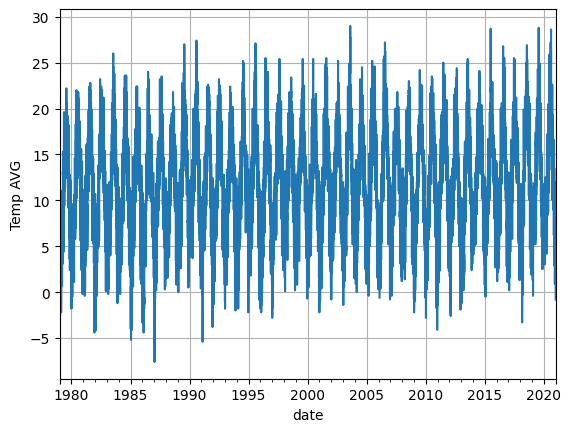

In [53]:
weather.mean_temp.plot()
plt.grid()
plt.ylabel('Temp AVG')
plt.show()

A noter que la méthode .plot() de pandas utilise en réalité matplotlib, c'est un cas d'interopérabilité que l'on rencontre souvent entre librairies de data science

Type de de 'ax' : <class 'matplotlib.axes._axes.Axes'>


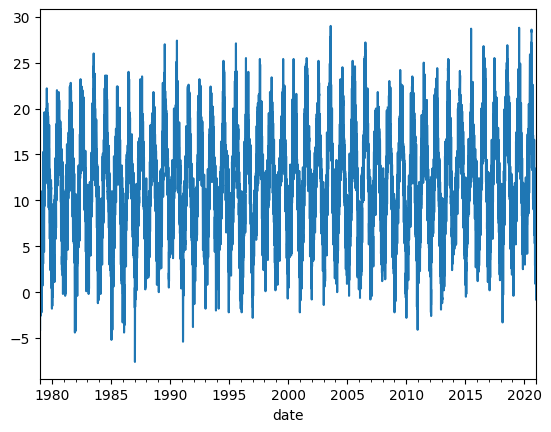

In [9]:
# On appelle .plot() et on stocke le résultat dans une variable 'ax'
ax = weather.mean_temp.plot()

# Vérifions le type de l'objet retourné
print(f"Type de de 'ax' : {type(ax)}")

C'est bien objet Matplotlib qui est retourné par une méthode pandas ! Puisque .plot() retourne un objet Matplotlib, vous pouvez mélanger la simplicité de Pandas avec la puissance de Matplotlib.

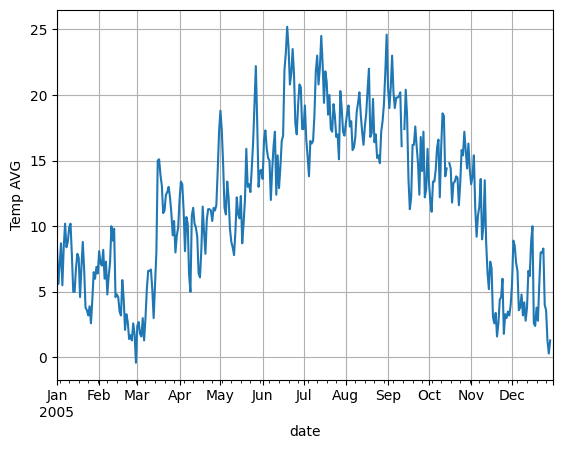

In [ ]:
# On peut ensuite sélectionner l'année qui nous intéresse

weather.loc['2005'].mean_temp.plot()
plt.grid()
plt.ylabel('Temp AVG')
plt.show()

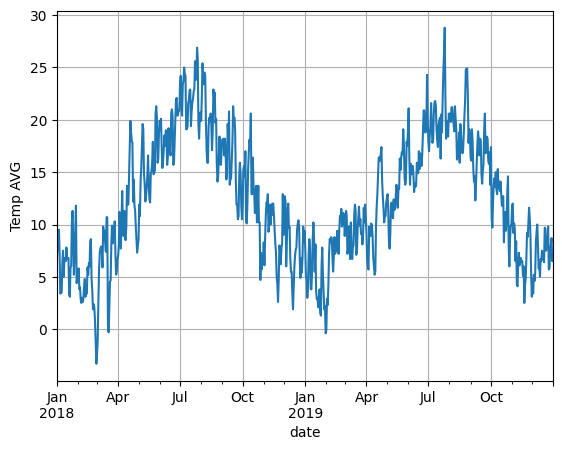

In [55]:
# On peut aussi faire du slicing pour sélectionner la période qui nous intéresse

weather.loc['2018':'2019'].mean_temp.plot()
plt.grid()
plt.ylabel('Temp AVG')
plt.show()

## Resampling avec Pandas

Nous aurons probablement besoin de réenchantilloner nos données temporelles pour avoir une visibilité meilleure, nous utiliserons alors la méthode .resample(), le resampling implique de changer la fréquence de vos données en agrégeant ou en interpolant les données à une fréquence différente.  
Pour sélectionner cette fréquence, il faut utiliser une string en paramètre de la fonction, ici 'M' pour un resampling par mois, 'W' par semaine

In [56]:
weather

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


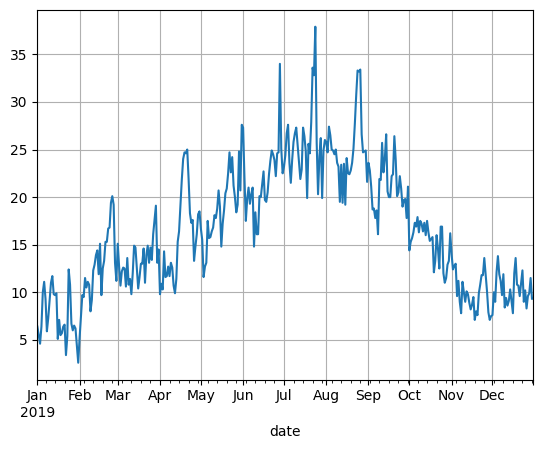

In [6]:
# Ici les températures maximales moyennes sur l'année 2019

weather.loc['2019'].resample('D').mean()['max_temp'].plot()
plt.grid()
plt.ylabel('')
plt.show()

## Rolling avec Pandas

Le rolling avec Pandas permet de calculer une opération roulante sur une série ou un DataFrame. Elle permet d'appliquer une fonction (par exemple, la moyenne ou la somme) sur une fenêtre glissante de données.

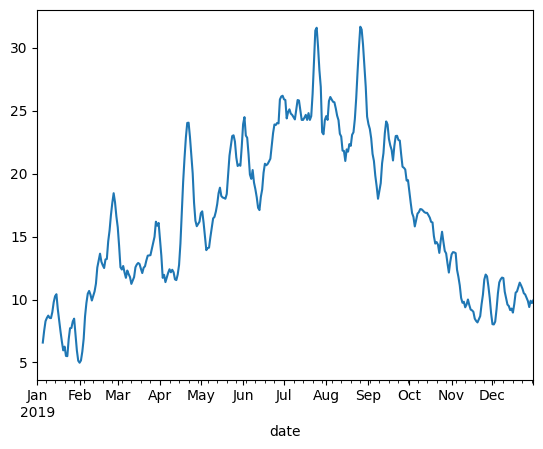

In [59]:
# Ici on calcule la moyenne des températures maximales 5 jours par 5 jours pour l'année 2019

weather.loc['2019'].rolling(window=5).mean()['max_temp'].plot()
plt.show()

# Exercices

Pour vous exercer, tracer la version matplotlib + la version avec seaborn

In [ ]:
# Récupérer les températures minimales moyennes (min_temp) de janvier de chaque année et afficher un graphique en bar (une barre par année)

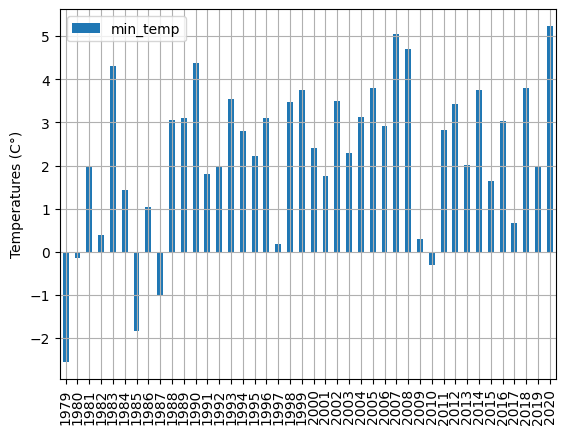

In [68]:
weather.head(3)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [ ]:
# Faire un scatter plot entre 'cloud_cover', 'global_radiation' en moyenne par mois sur l'année 2018 (donc 12 points dans le scatter plot)

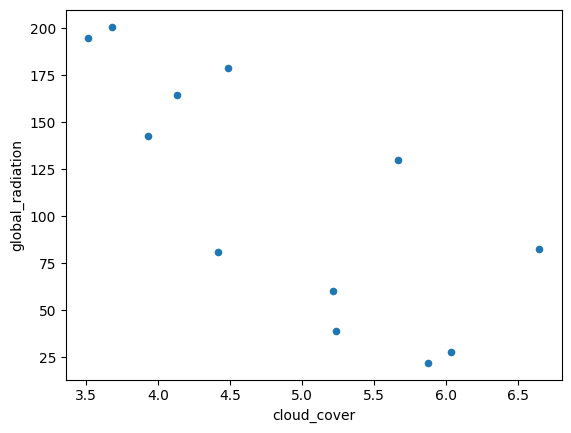

In [72]:
# Montrer la moyenne trimestrielle Temp_max sur l'ensemble du dataset

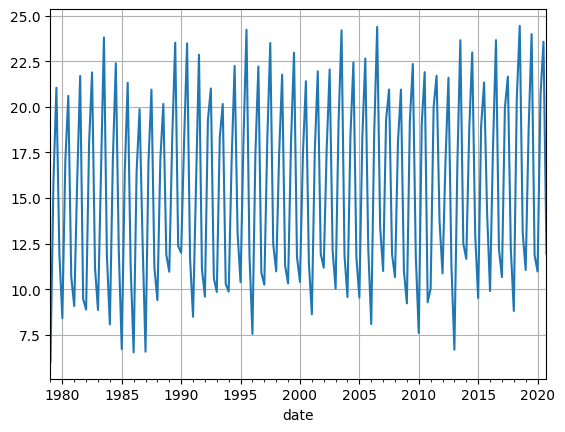

In [73]:
weather.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
# Donnez les températures moyennes en 2015 avec un graphique de taille (10,4) et avec un titre 'Température moyenne en 2015'

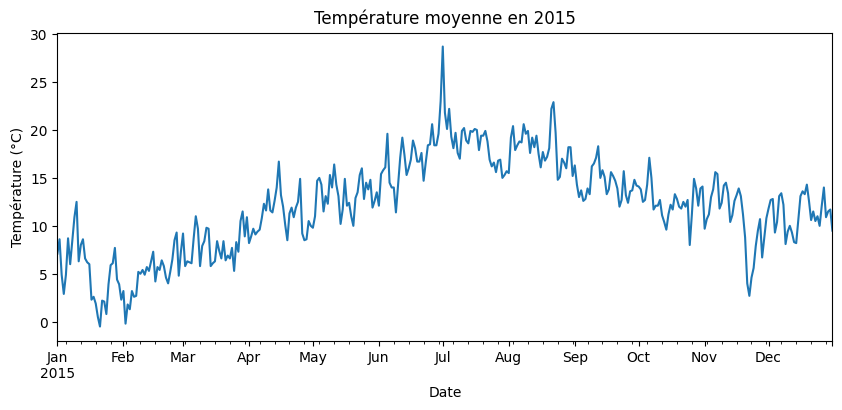

In [ ]:
# Superposer les courbes de max_temp et min_temp sur l'année 2016

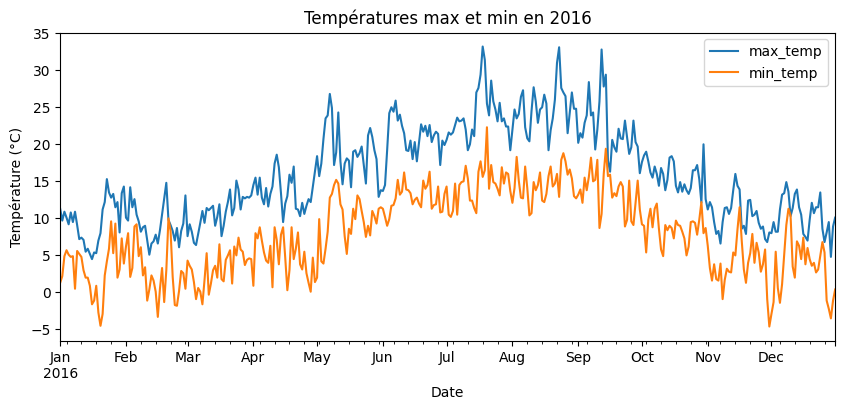

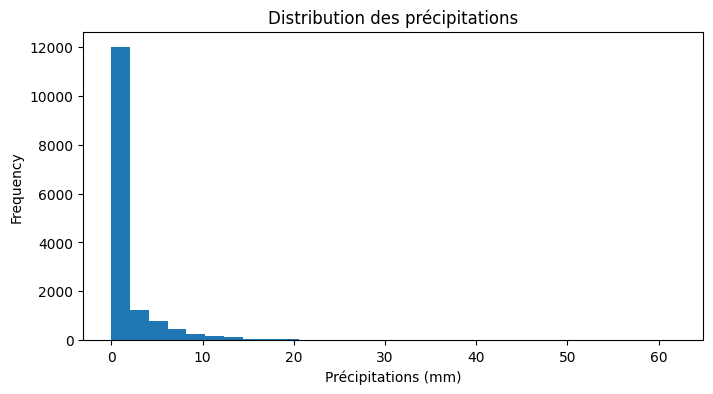

In [ ]:
# Afficher l'histogramme des précipitations (precipitation) avec 30 bins


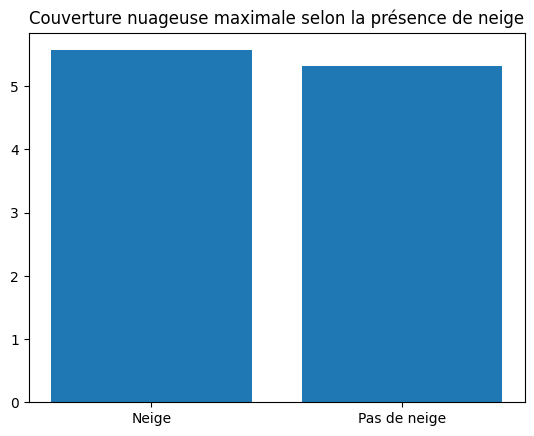

In [ ]:
# Afficher un graphique en bar de la couverture nuageuse maximale (cloud_cover) selon la présence de neige (snow_depth > 0 ou snow_depth == 0)


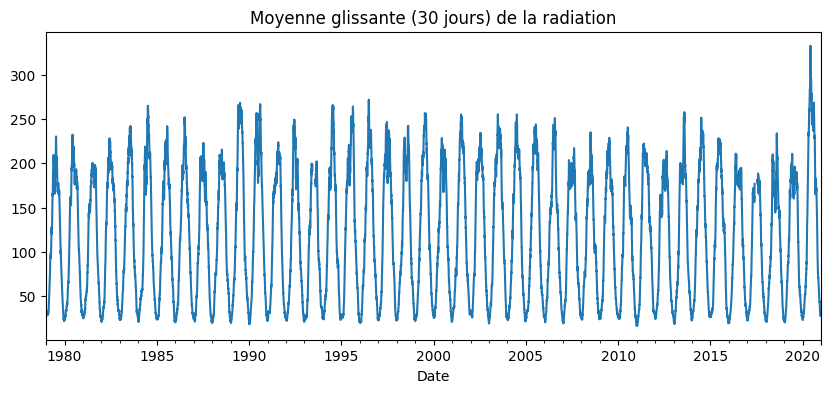

In [ ]:
# Affichez une moyenne glissante sur 30 jours sur la variable global_radiation
